# 11. 어제 오른 내 주식, 과연 내일은?
## 1-9. 프로젝트 : 주식 예측에 도전해 보자

- 1. NVDA
- 2. AMD
- 3. INTEL

# AMD

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTabDQqQdLB4VsxpZpJ1xgEHDMY0ZkWfOXAZiiaXk0scN3INSU3DgY-ui5VifgTL3SyB_E&usqp=CAU)
[AMD Stock Status](https://finance.yahoo.com/quote/AMD?p=AMD&.tsrc=fin-srch)

# STEP 1 : 시계열 데이터 준비
- 라이브러리 로드
- 데이터 셋 로드
- 데이터 크기
- 데이터 정보
- info()함수 활용 - 정보 확인
- 종가(Close)만 앞부분 출력 확인

In [1]:
#라이브러리 로드
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#데이터셋 로드
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/AMD.csv'
df = pd.read_csv(dataset_filepath)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-17,90.559998,90.959999,88.570000,89.940002,89.940002,32245500
1,2021-02-18,89.089996,89.599998,87.309998,88.639999,88.639999,35624900
2,2021-02-19,89.750000,90.419998,88.690002,89.580002,89.580002,29548300
3,2021-02-22,88.150002,88.300003,85.209999,85.370003,85.370003,36930200
4,2021-02-23,83.400002,85.110001,79.360001,84.739998,84.739998,49720900


In [3]:
# 데이터 크기
df.shape

(254, 7)

In [4]:
#데이터 정보
df.info

<bound method DataFrame.info of            Date        Open        High         Low       Close   Adj Close  \
0    2021-02-17   90.559998   90.959999   88.570000   89.940002   89.940002   
1    2021-02-18   89.089996   89.599998   87.309998   88.639999   88.639999   
2    2021-02-19   89.750000   90.419998   88.690002   89.580002   89.580002   
3    2021-02-22   88.150002   88.300003   85.209999   85.370003   85.370003   
4    2021-02-23   83.400002   85.110001   79.360001   84.739998   84.739998   
..          ...         ...         ...         ...         ...         ...   
249  2022-02-10  128.839996  131.759995  124.610001  125.769997  125.769997   
250  2022-02-11  126.139999  127.169998  111.809998  113.180000  113.180000   
251  2022-02-14  115.510002  118.370003  113.459999  114.269997  114.269997   
252  2022-02-15  117.190002  121.879997  114.360001  121.470001  121.470001   
253  2022-02-16  119.050003  119.540001  114.220001  117.690002  117.690002   

        Volume  
0 

> # info()함수 활용 - 정보 확인
- 각 행, 컬럼, 인텍스, 결측치, 타입, 메모리 사용, 데이터 범위 등 다양한 정보를 확인
    - 254씩 행이 들어가 있는 걸 확인 할 수 있으며
    - 결측치가 없는 걸로 보여지며
    - 타입은 Date : object , Volume : int64 정수이고 그외에 타입은 float64 소수인 걸 확인

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       254 non-null    object 
 1   Open       254 non-null    float64
 2   High       254 non-null    float64
 3   Low        254 non-null    float64
 4   Close      254 non-null    float64
 5   Adj Close  254 non-null    float64
 6   Volume     254 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [6]:
# 종가(Close)만 앞부분 출력 확인
ts = df['Close']

ts.head()

0    89.940002
1    88.639999
2    89.580002
3    85.370003
4    84.739998
Name: Close, dtype: float64

# STEP 2 : 각종 전처리 수행
- 결측치 처리
- 로그 변환

In [7]:
# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

In [8]:
# 로그 변환 시도 
ts_log = np.log(ts)

# STEP 3 : 시계열 안정성 분석
- 정성적 그래프 분석
- 정량적 Augmented Dicky-Fuller Test
- 시계열 분해(Time Series Decomposition)
- Residual 안정성 확인

In [12]:
# 정성적 그래프 분석
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean() # 이동 평균 시계열
    rolstd = timeseries.rolling(window=window).std() # 이동 표준편차 시계열
    
    # 원본 시계열, 이동평균, 이동표준편차를 plot으로 시각화
    orig = plt.plot(timeseries, color='blue', label = 'Original')
    mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title("Rolling Mean & Standard Derivatioin")
    plt.show(block = False)

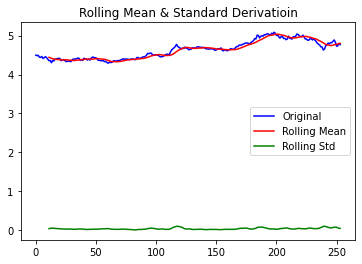

In [13]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

In [ ]:
#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

In [ ]:
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

# STEP 5 : 적정 ARIMA 모수 찾기
- ACF, PACF 그려보기 -> p,q 구하기
- 차분 안정성 확인 -> d 구하기
    - 1차분 구하기
    - 2차분 구하기

In [ ]:
# ACF, PACF 그려보기 -> p,q 구하기
plt.figure(figsize=(15,4))
plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()


In [ ]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

In [ ]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

# STEP 6 : ARIMA 모델 훈련과 테스트
- 학습 데이터 분리
- 데이터셋의 형태 확인
- 경고 무시
- ARIMA 모델 빌드와 훈련
    - Build Model
- 모델 테스트 및 플로팅
- 최종 예측 모델 정확도 측정(MAPE)

In [21]:
# 학습 데이터 분리 : 학습 데이터와 테스트 데이터를 분리 / 분리 비율은 학습과 테스트에 9:1
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]

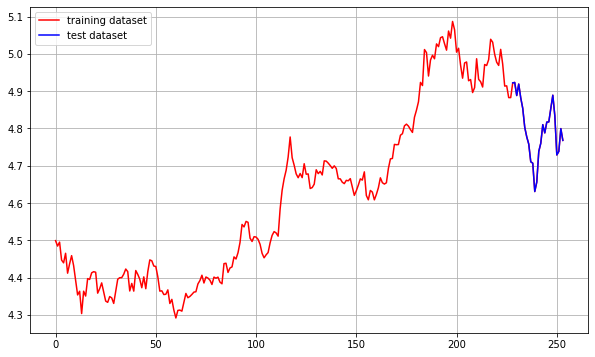

In [22]:
# 데이터셋의 형태 확인
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [23]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

0    4.499143
1    4.484583
Name: Close, dtype: float64
(228,)
(26,)


In [24]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

# ARIMA 모델 빌드와 훈련
from statsmodels.tsa.arima.model import ARIMA

# Build Model
model = ARIMA(train_data, order=(2, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  228
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 495.574
Date:                Thu, 17 Feb 2022   AIC                           -981.148
Time:                        13:30:25   BIC                           -964.001
Sample:                             0   HQIC                          -974.230
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6119      0.435     10.596      0.000       3.759       5.465
ar.L1          0.7474      0.953      0.784      0.433      -1.120       2.615
ar.L2          0.2476      0.948      0.261      0.7

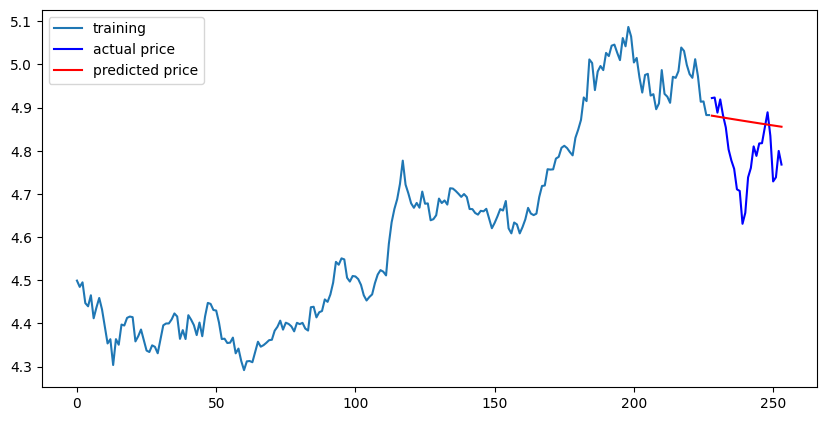

In [25]:
#모델 테스트 및 플로팅

# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [26]:
# 최종 예측 모델 정확도 측정(MAPE)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  152.3992766009352
MAE:  10.062945171091057
RMSE:  12.345010190394142
MAPE: 8.74%


# STEP 7 : 다른 주식 종목 예측해 보기
>최종 예측 모델 정확도 측정(MAPE)
>- MSE : 평균제곱오차 - 잔차(오차)의 제곱에 대한 평균을 취한 값
>- MAE : 평균절대오차 - 모든 절대 오차의 평균
>- RMSE: 평균제곱근 편차 - 추정 값 또는 모델이 예측한 값과 실제 환경에서 관찰되는 값의 차이를 다룰 때 흔히 사용하는 측도
>- MAPE: 평균절대비오차 - 오차가 예측값에서 차지하는 정도를 나타내는 지표(정확도를 오차의 백분율로 표시)

- NVDA
    - MSE:  685.3606703300916
    - MAE:  21.593667039906936
    - RMSE:  26.179394002346417
    - MAPE: 9.09%
- AMD
    - MSE:  152.3992766009352
    - MAE:  10.062945171091057
    - RMSE:  12.345010190394142
    - MAPE: 8.74%
- INTEL
    - MSE:  30.667319267774605
    - MAE:  4.841161822537042
    - RMSE:  5.537808164587737
    - MAPE: 9.88%

# 회고
- 구현 완료!
- MAPE: 15%이하로 미만의 정확도로 예측함
    - 10%이하로 정확도 예측함
        - NVDA
            - MAPE: 9.09%
        - AMD
            - MAPE: 8.74%
        - INTEL
            - MAPE: 9.88%
        

- 구현은 완료하였으나 더 많은 이해가 필요하다.